# 회귀분석

### 역사
* 회귀분석(regression analysis)은 생물학자 프랜시스 골턴(Francis Galton)이 '평균으로의 회귀'(regression to the mean / regression towards mediocrity) 현상을 증명하기 위해 만든 것으로 알려져 있다. '평균으로의 회귀'는 부모와 아이의 키를 측정했을 때 쉽게 상상할 수 없는 극단적인 값이 되어도, 그 다음에 새로 측정을 했을 때에는 평균에 더 가까워지는 (평균으로 회귀하는) 경향성을 보고 골턴이 일반화하기 위해서 쓴 용어다.

* 골턴은 부모와 그 자식의 키에 대한 자료를 만들어 205명의 부모와 그들의 자식 930명의 키에 대한 자료를 분석하여 회귀계수가 2/3임을 밝혔다. 가우스의 최소제곱법을 쓰지 않고 타원으로 적합시켜 회귀계수가 2/3임을 찾아낸 것이 특이하다. 즉, 키는 유전적인 요소가 강력하게 작용한다는 것을 밝힌 것이다. 골턴은 산점도에 최초로 선형식을 표현하여 오늘날의 회귀분석을 성립하는 데 지대한 공을 세웠다.

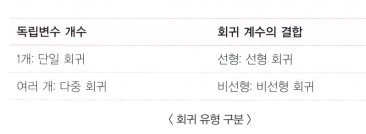

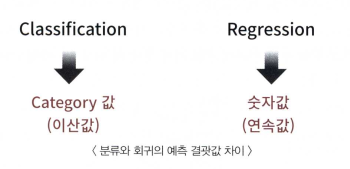

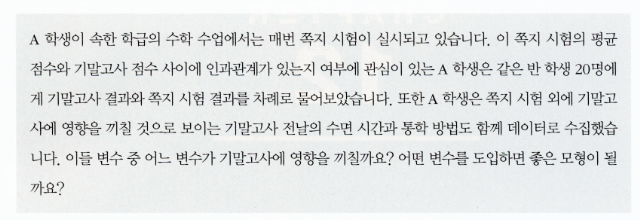

* 모형 : 현실 세계에서 발생하는 복잡한 현상의 특징을 잘 포착하여 단순화한 것
* 회귀분석에서는 복잡한 현상을 사람이 이해할 수 있을 정도의 간단한 구조로 충분히 설명할 수 있는 모형을 찾는 것이 목적 

* statsmodels는 회귀분석을 포함한 다양한 모형에 대한 계산을 간단하게 실행할 수 있는 라이브러리입니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('./data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


## 단순회귀모형

* 회귀분석(regression analysis)이란 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법
* 이때 원인이 되는 변수를 설명변수(explanatory variable)라 하고, 결과가 되는 변수를 반응변수(response variable)라고 합니다.
* 설명변수와 반응변수를 각각 독립변수(independent variable)와 종속변수(dependent variable)라고 부릅니다.

* 단순회귀모형은 설명변수와 반응변수가 1개씩인 가장 단순한 모델 

In [3]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

* 반응변수 기말고사 점수, 
* 설명변수 쪽지 시험의 평균 점수 
* 단순회귀모형

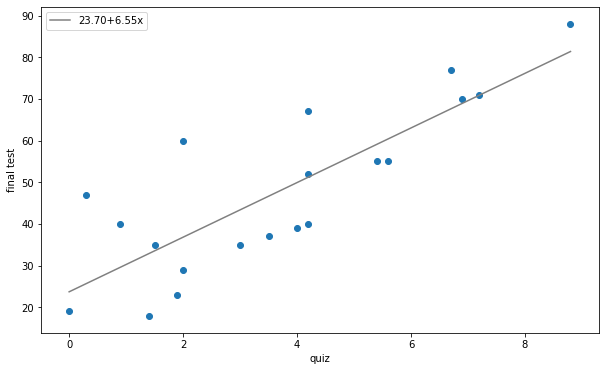

In [4]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

### 회귀분석에서의 가설
* 설명변수 x와 반응변수 y사이에 다음과 같은 관계를 가정 

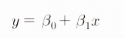

* 기본적인 관계는 직선상에 있다고 생각하고, 다른 요인에 관해서는 예측할 수 없는 확률적인 것이라고 생각하겠습니다. 
* 이 예측할 수 없는 부분을 오차항(error term)이라고 하고 ${\varepsilon_i}$로 나타내면, 기말고사 결과 ${Y_i}$는 다음과 같이 작성할 수 있습니다. 

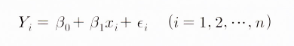

* 추가로 회귀분석에서는 다음의 두 가지를 가정합니다.

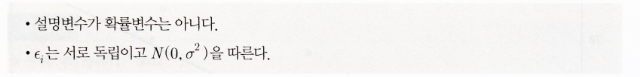

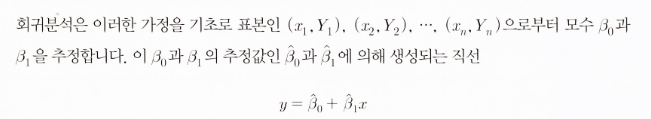

* 위의 식이 회귀직선(regression line)이라고 부르는 것으로, 그 계수 ${\widehat\beta_0}$과 ${\widehat\beta_1}$을 회귀계수(regression coefficient)라고 합니다.

### statsmodels에 의한 회귀분석
* smf.ols라는 함수에 설명변수와 반응변수의 관계를 나타낸 문자열과 DataFrame을 전달하고, 추가로 fit메서드를 호출하여 실행할 수 있습니다. .

In [5]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           8.59e-06
Time:                        10:24:17   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 회귀계수

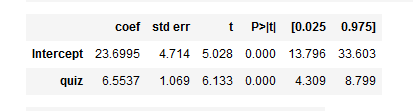

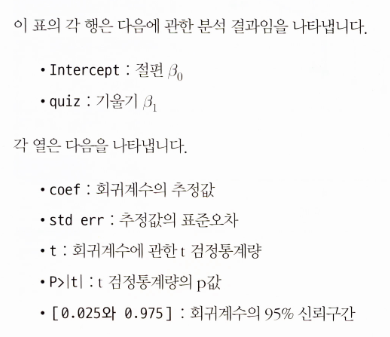

#### 점추정

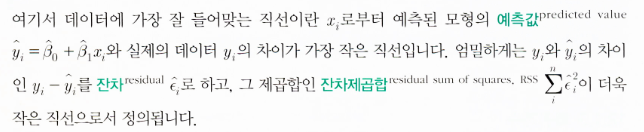

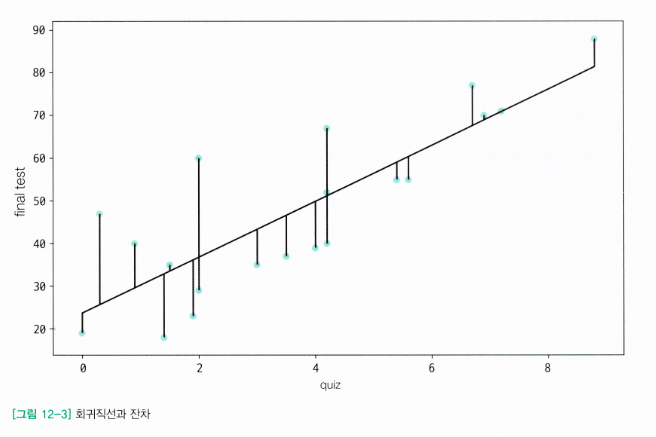

RSS(잔차제곱합)을 최소화하는 ${\widehat\beta_0}$과 ${\widehat\beta_1}$을 구하는 방법을 최소제곱법(ordinary least squares)이라고 합니다.

#### 잔차 : 실제 출력 변수와 예측한 출력 변수의 차
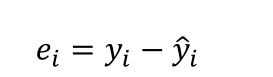

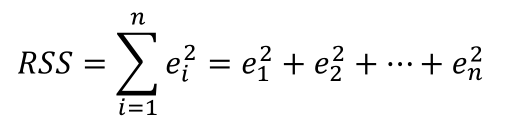

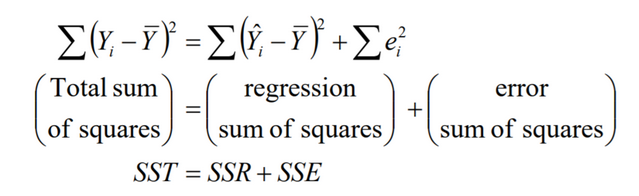

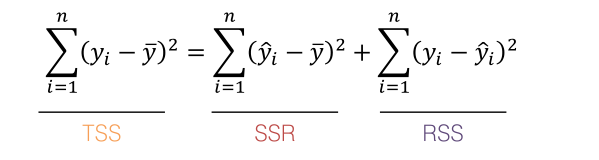

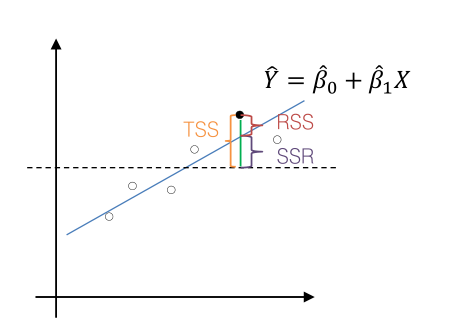

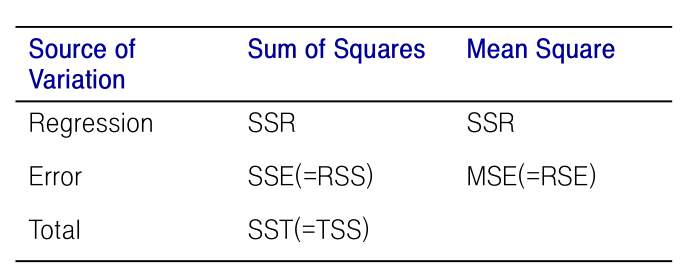

* 최소제곱법 예제 

In [6]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

* 최소제곱법은 np.linalg.lstsq로 구현
* X는 설명변수, y는 반응변수

In [8]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(23.69949534673122, 6.553732606043082)

* ${\widehat\beta_0}$과 ${\widehat\beta_1}$을 구했기 때문에 예측값 및 잔차를 계산할 수 있습니다.

In [9]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

* 잔차의 자유도는 회귀계수의 수 p + 1만큼 감소하여 n - p - 1이 되므로, 모분산의 불편추정량은 n-p-1로 나누어 계산되는 값입니다.

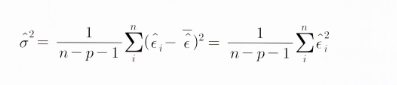

In [10]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

### 구간추정

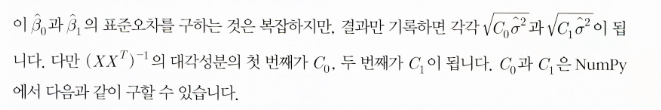

In [12]:
X.shape

(20, 2)

In [11]:
np.dot(X.T, X)

array([[ 20.  ,  73.7 ],
       [ 73.7 , 389.19]])

In [13]:
np.linalg.pinv(np.dot(X.T, X))

array([[ 0.165, -0.031],
       [-0.031,  0.009]])

In [15]:
#help(np.diag)
x1 = np.arange(9).reshape((3,3))
np.diag(x1)

array([0, 4, 8])

In [17]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [18]:
C0, C1

(0.16546420022873098, 0.008503003686052106)

In [19]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645705, 1.0685841387335373)

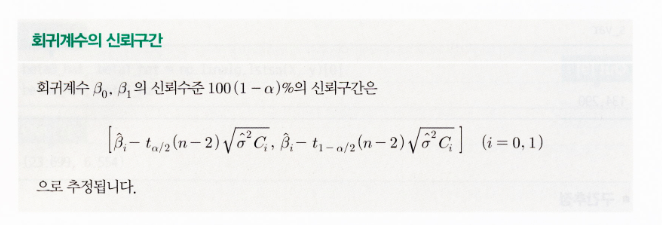

In [20]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796091272760252, 33.60289942070219)

In [21]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125889, 8.798744574960274)

### t 검정
* 회귀계수에 대한 가설검정을 설명합니다. 

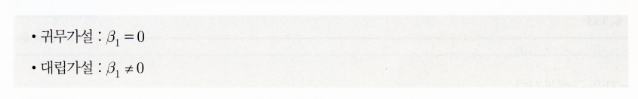

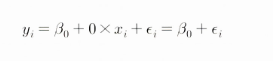

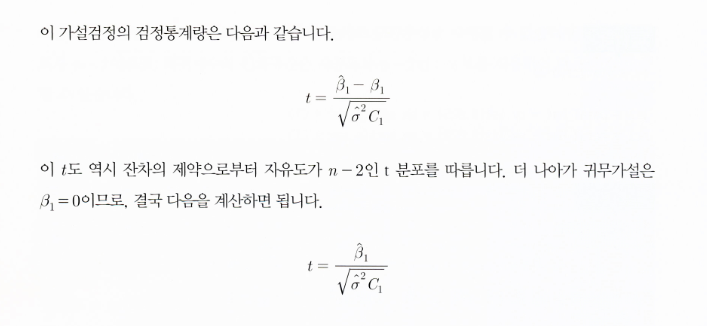

In [22]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532021

In [23]:
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

* 귀무가설은 기각되어, 쪽지 시험 평균 점수와 기말고사 점수 사이에는 인과관계가 있다고 말할 수 있다

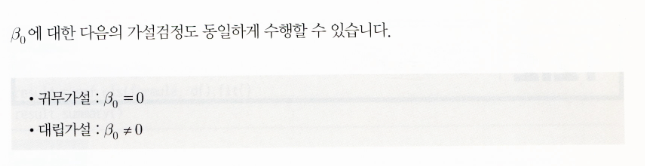

In [24]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.0276442064401285

In [25]:
(1 - rv.cdf(t)) * 2

8.745298393186829e-05

## 실습 
#### 파일명 : 5-1-1-beer.csv

In [26]:
beer = pd.read_csv("./data/5-1-1-beer.csv")

In [29]:
beer.head(1)

,beer,temperature
0,45.3,20.5


In [28]:
formula = 'beer ~ temperature'
result = smf.ols(formula, beer).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           1.11e-05
Time:                        11:20:53   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 중회귀모형
* 설명변수가 2개 이상인 모형을 중회귀 모형(multiple regression model)이라고 합니다. 

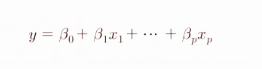

In [30]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           6.19e-06
Time:                        11:24:13   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 회귀계수

In [31]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

In [32]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(-1.8709143470995908, 6.42887834300237, 4.191706546398685)

In [33]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

In [34]:
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [35]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.440253332543481, 7.943159760253889)

### 가변수

In [37]:
df.school_method.unique()

array(['bus', 'bicycle', 'walk'], dtype=object)

* 통학 방법을 포함하는 회귀분석을 수행하고 싶은데 통학 방법은 범주형 데이터이기 때문에 불가능 합니다. 
* 이 문제를 해결하려면 질적변수를 변환하여 양적변수와 동일하게 취급할 수 있게 하는 기법이 필요한데 이 기법이 가변수(dummy variable)입니다.

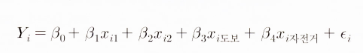

In [38]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           7.47e-05
Time:                        11:27:20   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 모형의 선택

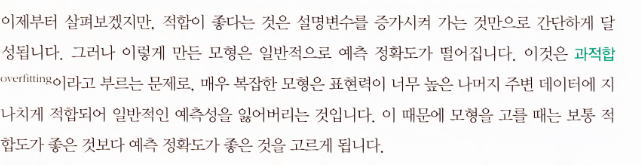

In [39]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           8.59e-06
Time:                        11:32:38   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 예측값

In [40]:
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

* 잔차

In [41]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [42]:
np.sum(eps_hat ** 2)

2417.227825229262

### 결정계수
* 모형의 데이터에 대한 적합도를 나타내는 기본적인 지표
* ${R^2}$로 표기

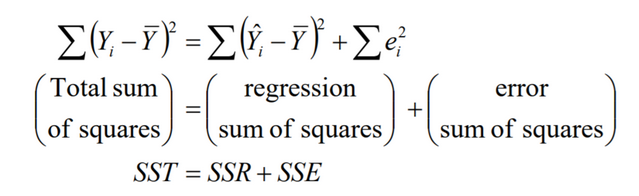

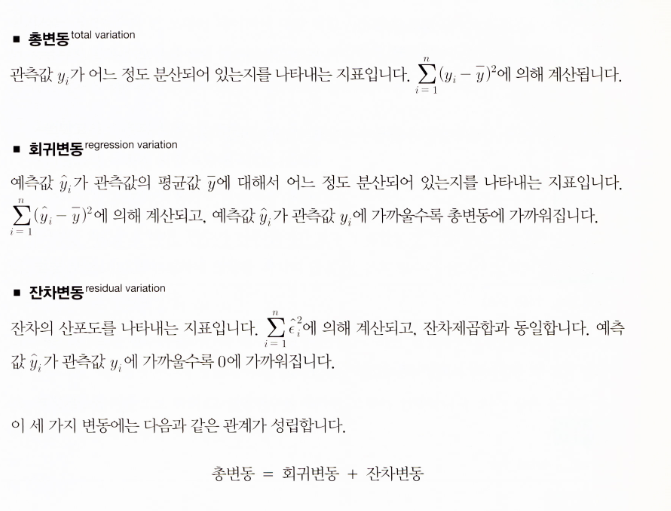

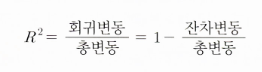

In [43]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [44]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999996)

In [45]:
exp_var / total_var

0.6763457665504996

In [46]:
np.corrcoef(x, y)[0, 1] ** 2

0.6763457665504998

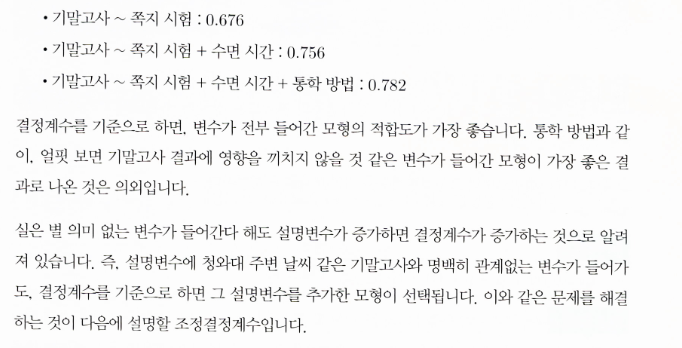

### 조정결정계수
* 조정결정계수(adjusted R-square)는 자유도를 고려한 결정계수입니다.

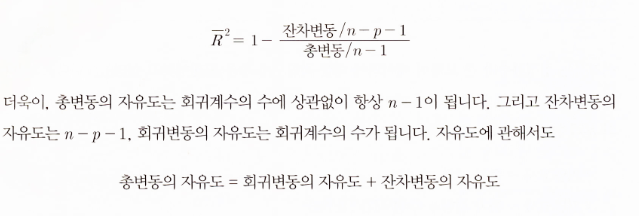

* 회귀변동의 자유도는 모형의 자유도라고 부릅니다.

In [47]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033057

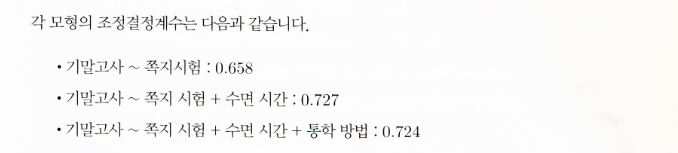

### F검정

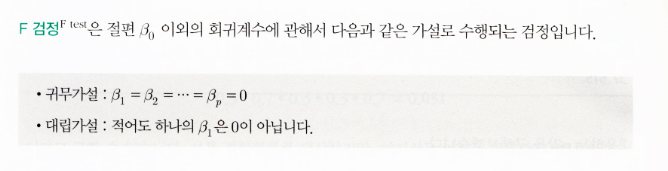

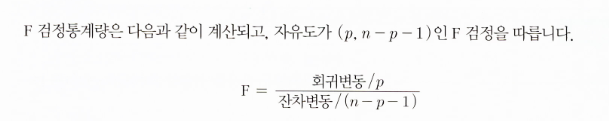

In [48]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
f

37.61490671126522

In [49]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

8.590875866687497e-06

### 최대 로그 우도와 AIC

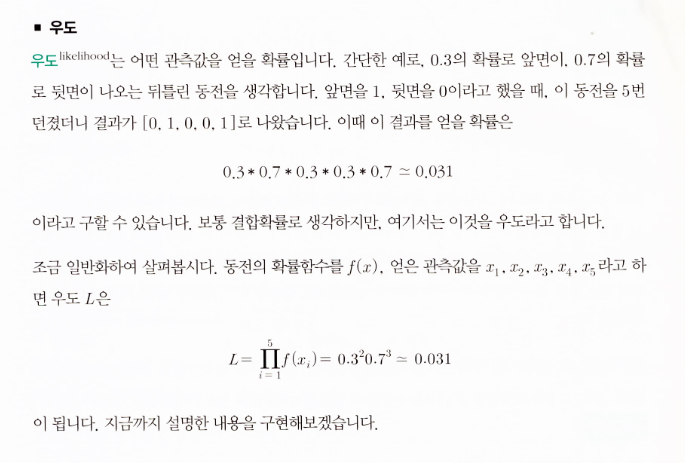

In [51]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.030870000000000005

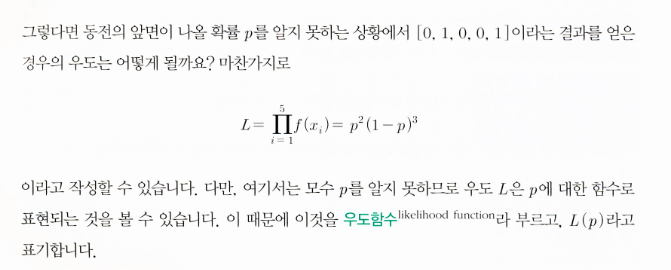

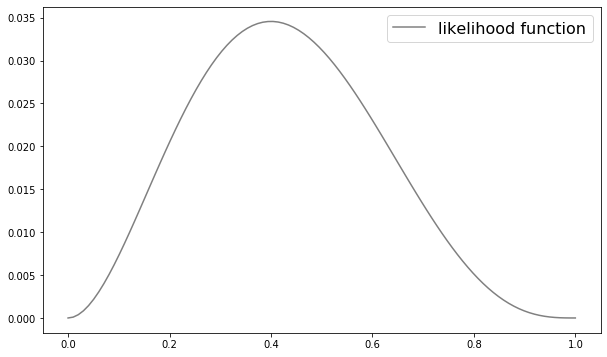

In [52]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

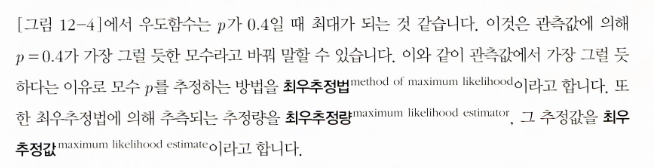

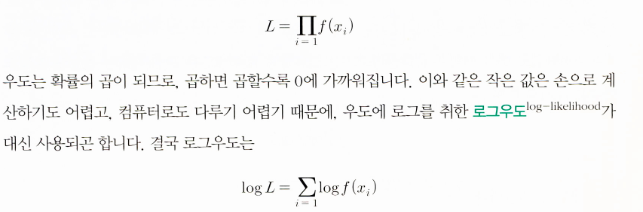

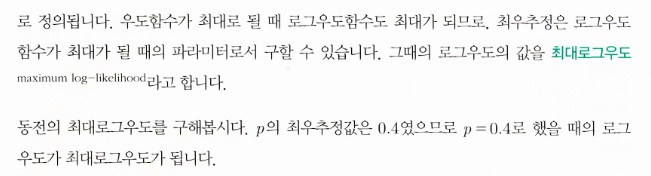

In [55]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
mll

-3.365058335046282

In [ ]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [56]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.32521428624038

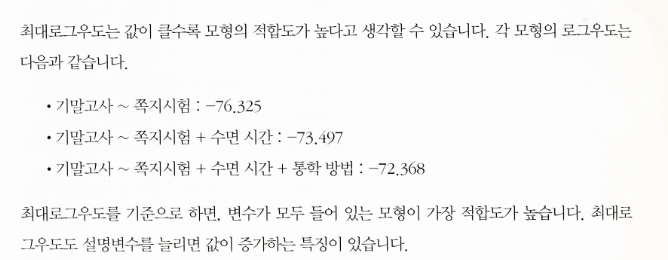

### AIC

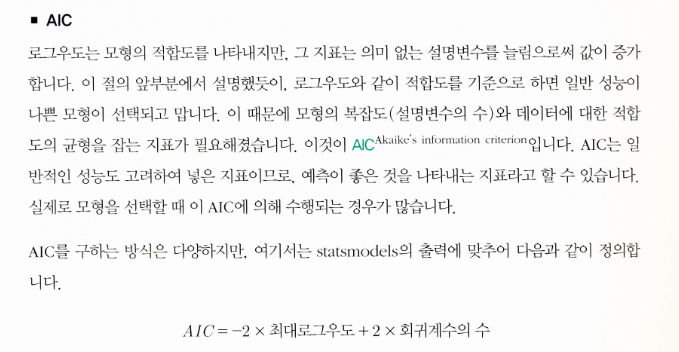

In [57]:
aic = -2 * mll + 2 * (p+1)
aic

156.65042857248076

In [58]:
bic = -2 * mll + np.log(n) * (p+1) 
bic

158.64189311958876

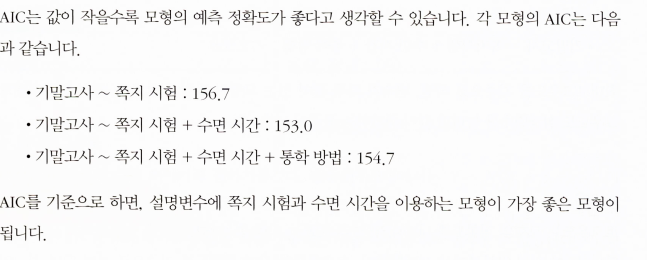

## 모형의 타당성

In [61]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           6.19e-06
Time:                        11:59:53   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
eps_hat = np.array(result.resid)

### 다중공선성

* 다중공선성은 설명변수 사이에 강한 상관이 생겼다는 것을 의미합니다.
* 다중공선성이 크면 회귀계수의 분산이 커져 모형의 예측 결과가 나빠집니다. 

# 나이, 생년월일 

In [63]:
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [64]:
df.corr()

,quiz,final_test,sleep_time,mid_test
quiz,1.000000,0.822402,0.055399,1.000000
final_test,0.822402,1.000000,0.327505,0.822402
sleep_time,0.055399,0.327505,1.000000,0.055399
mid_test,1.000000,0.822402,0.055399,1.000000


In [65]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           8.59e-06
Time:                        12:03:04   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
df.head(1)

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4


In [68]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['quiz', 'sleep_time', 'mid_test']].values, i) for i in range(df[['quiz', 'sleep_time', 'mid_test']].shape[1])]
vif["features"] = df[['quiz', 'sleep_time', 'mid_test']].columns
vif

C:\Users\Playdata\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,quiz
1,3.111667,sleep_time
2,inf,mid_test


In [69]:
# sales : 종속변수 
# 나머지 : 설명변수 
sales = pd.read_csv("./data/5-3-1-lm-model.csv")

In [87]:
sales
fo = 'sales ~  temperature '

In [88]:
result = smf.ols(fo, sales).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     18.43
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           4.14e-05
Time:                        14:11:49   Log-Likelihood:                -416.72
No. Observations:                 100   AIC:                             837.4
Df Residuals:                      98   BIC:                             842.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     184.1626      7.199     25.581      0.000     169.876     198.449
temperature     1.4526      0.338      4.294      0.000       0.781       2.124
==============================================================================
Omnibus:                        2.390   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.780
Skew:                          -0.144   Prob(JB):                        0.411
Kurtosis:                       2.413   Cond. No.                         97.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
sales.keys()

Index(['humidity', 'price', 'sales', 'temperature', 'weather'], dtype='object')

In [82]:
sales.corr()

,humidity,price,sales,temperature
humidity,1.000000,-0.021646,0.176066,0.732218
price,-0.021646,1.000000,0.219711,0.158822
sales,0.176066,0.219711,1.000000,0.397899
temperature,0.732218,0.158822,0.397899,1.000000


In [79]:
vif = pd.DataFrame()
vif["VIF Factor"] = \
[variance_inflation_factor(sales[['humidity', 'price', 'temperature']].values, i) 
  for i in range(sales[['humidity', 'price', 'temperature']].shape[1])]
vif["features"] = sales[['humidity', 'price', 'temperature']].columns
vif

,VIF Factor,features
0,94.781283,humidity
1,45.892341,price
2,44.311220,temperature
